In [66]:
import numpy as np   # library for handling numbers
import matplotlib.pyplot as plt  # library for ploting 

### Estimating Amplitude and Phase Offsets




![image](img_1.png)



![image](img.png)  



In [67]:
g = np.arange(0, 30.1, 0.1)
phi = np.deg2rad(np.arange(0, 30.2, 0.2))

# Initialize the IMRR_estimate array
IMRR_estimated = np.zeros((len(g), len(phi)))

# Calculate IMRR for each combination of g and phi
for i in range(len(g)):
    for j in range(len(phi)):
        try:
          gamma = g[i]
          phi_rad = phi[j]
          IMRR_estimated[i, j] = 10 * np.log10((gamma**2 + 1 - 2 * gamma * np.cos(phi_rad)) / (gamma**2 + 1 + 2 * gamma * np.cos(phi_rad)))
        except :
            print(f"Error at g={gamma}, phi={phi_rad}")
            

# Find the value closest to -25 dB
target_db = -25
closest_value = np.abs(IMRR_estimated - target_db).min()
closest_indices = np.where(np.abs(IMRR_estimated - target_db) == closest_value)

# Extract the corresponding g and phi values
closest_g = g[closest_indices[0][0]]
closest_phi = phi[closest_indices[1][0]]

print(f"Closest IMRR value: {IMRR_estimated[closest_indices][0]:.2f} dB")
print(f"Corresponding g: {closest_g:.2f}")
print(f"Corresponding phi (in degrees): {np.rad2deg(closest_phi):.2f}")


C:\Users\Elsadiq\AppData\Local\Temp\ipykernel_25220\3740420503.py:13: RuntimeWarning: divide by zero encountered in log10
  IMRR_estimated[i, j] = 10 * np.log10((gamma**2 + 1 - 2 * gamma * np.cos(phi_rad)) / (gamma**2 + 1 + 2 * gamma * np.cos(phi_rad)))


Closest IMRR value: -25.02 dB
Corresponding g: 1.10
Corresponding phi (in degrees): 3.40


In [68]:
f_c = 10**10  # 10 GHz carrier frequency
f_m =  10**7  # 10 MHz message frequency
f_rf = f_c + f_m  # RF frequency
theta = np.pi / 4  # Phase of the input signal

In [69]:
# Time vector
t_micro = np.linspace(0,.6e-6, 600)
t_nano=np.linspace(0,.6e-9, 600)
# Input signal r(t)
r_t = np.cos(2 * np.pi * f_rf * t_nano + theta)

# IQ imbalance model
z_i = np.cos(2 * np.pi * (f_rf - f_c) * t_micro + theta)  # I component with imbalance
z_q = -closest_g * np.sin(2 * np.pi * (f_rf - f_c) * t_micro + theta - closest_phi)  # Q component with imbalance

In [70]:
# Frequency domain analysis
# Generate frequency bins for the FFT
t_micro_f = np.fft.fftfreq(len(t_micro), (t_micro[1] - t_micro[0]))  # mega hz
t_nano_f = np.fft.fftfreq(len(t_nano), (t_nano[1] - t_nano[0]))      # giga hz

r_t_f = np.fft.fft(r_t)/len(r_t)  
# Perform FFT on the I component
z_i_f = np.fft.fft(z_i)/len(z_i)

# Perform FFT on the Q component
z_q_f = np.fft.fft(z_q)/len(z_q)

In [71]:
#Print the maximum values of the FFT magnitudes
print("Max FFT magnitude of r_t:", max(np.abs(r_t_f)))
print("Max FFT magnitude of z_i:", max(np.abs(z_i_f)))
print("Max FFT magnitude of z_q:", max(np.abs(z_q_f)))

Max FFT magnitude of r_t: 0.49976407560301783
Max FFT magnitude of z_i: 0.49991765687050504
Max FFT magnitude of z_q: 0.5498550793007452


In [72]:
import matplotlib.pyplot as plt
import numpy as np

def plot(I, time, time_f, Z_IQ, Z_IQ_f, freq_range=None, unit_s="µ", unit_f="M"):
    """
    Plots the magnitude of a signal in both the time and frequency domains.

    Parameters:
    - I: str
        A label for the plot titles to describe the data being plotted.
    - time: array-like
        The time domain data to be plotted in the time domain subplot.
    - time_f: array-like
        The frequency domain data to be plotted in the frequency domain subplot.
    - Z_IQ: array-like
        The time domain signal values to be plotted. Assumed to be complex or real.
    - Z_IQ_f: array-like
        The frequency domain signal values to be plotted. Assumed to be complex or real.
    - freq_range: tuple, optional
        A tuple specifying the frequency range to zoom in on (min_freq, max_freq).

    Returns:
    - None
        Displays the plot with two subplots: one for the time domain and one for the frequency domain.
    """
    # Create a figure and a set of subplots
    fig, (axt, axf) = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

    # Set font properties
    plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})

    # Plot in the first subplot (Time Domain)
    axt.plot(time, Z_IQ, linewidth=2)  # Increased line width
    axt.set_title(f"{I} in Time Domain", weight="bold")
    axt.set_xlabel(f"Time ({unit_s}s)", weight="bold")
    axt.set_ylabel("Amplitude Imbalance", weight="bold")
    axt.grid()

    # Plot in the second subplot (Frequency Domain)
    axf.stem(time_f, np.abs(Z_IQ_f), basefmt=" ")
    axf.set_title(f"{I} in Frequency Domain", weight="bold")
    axf.set_xlabel(f"Frequency ({unit_f}Hz)", weight="bold")
    axf.set_ylabel("Amplitude Imbalance", weight="bold")
    axf.grid()

    # Apply frequency range if specified
    if freq_range is not None:
        axf.set_xlim(freq_range)
    
    plt.savefig(f"{I}.png")
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


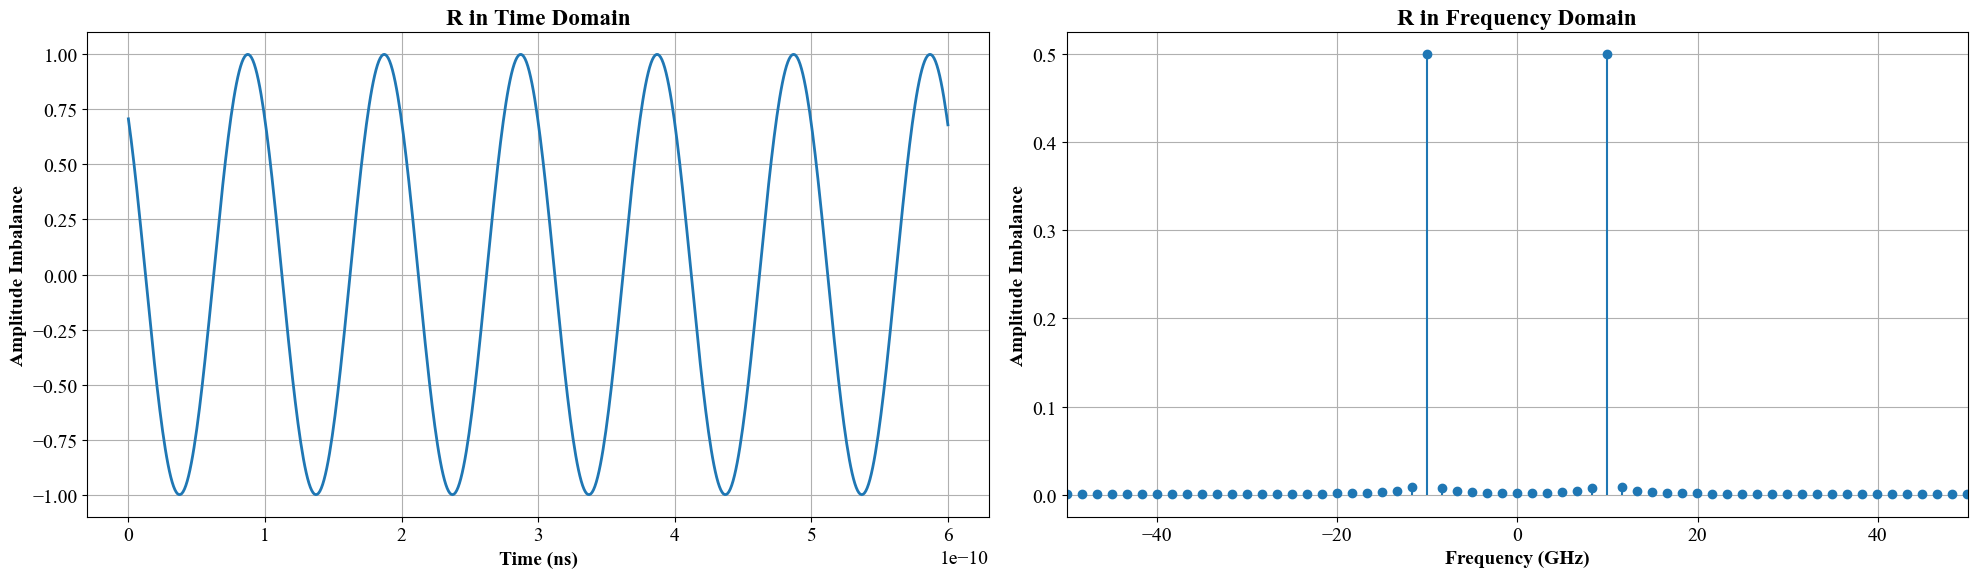

In [73]:
plot("R", t_nano, t_nano_f/10**9, r_t, r_t_f,[-5*10,5*10],"n","G")


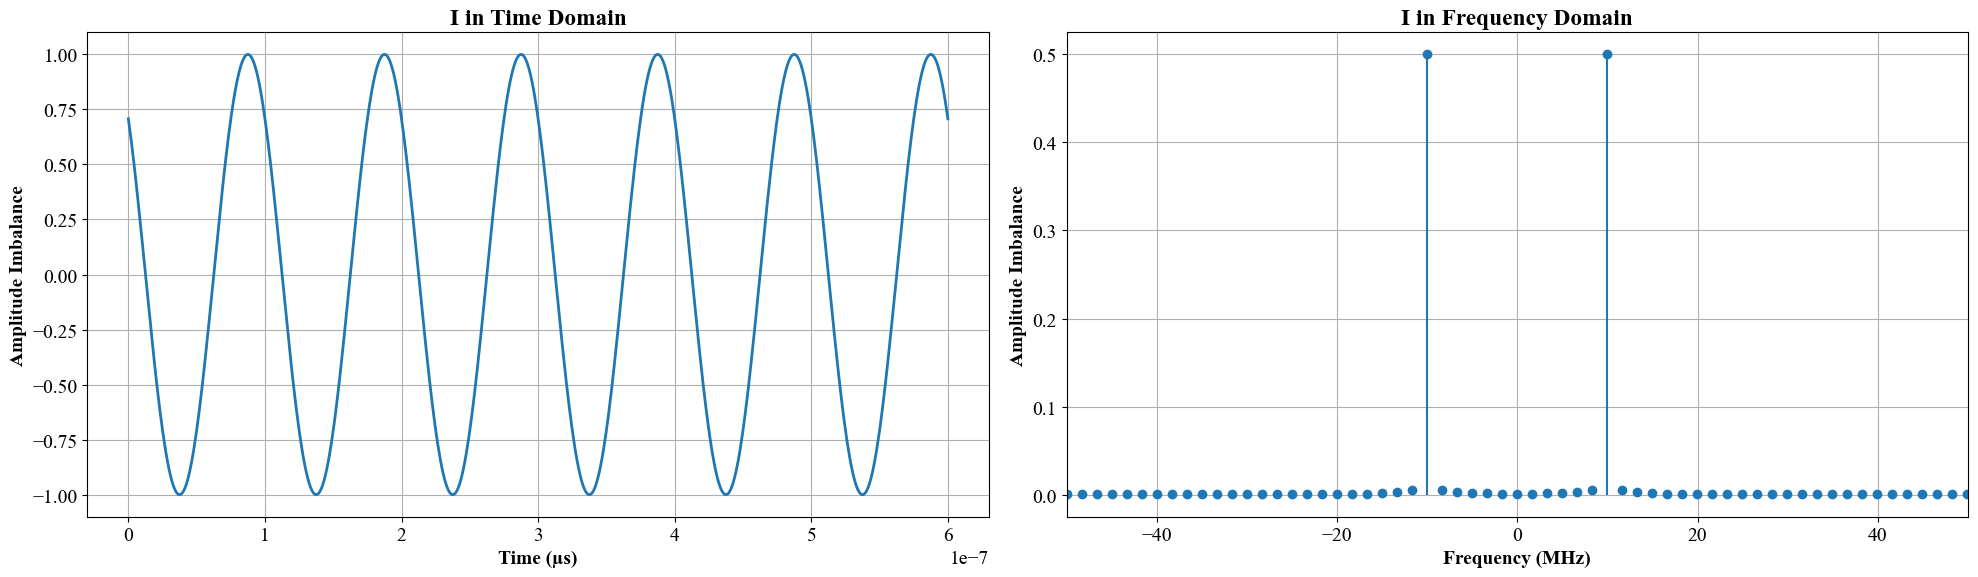

In [74]:
plot("I", t_micro, t_micro_f/10**6, z_i, z_i_f,[-5*10,5*10])

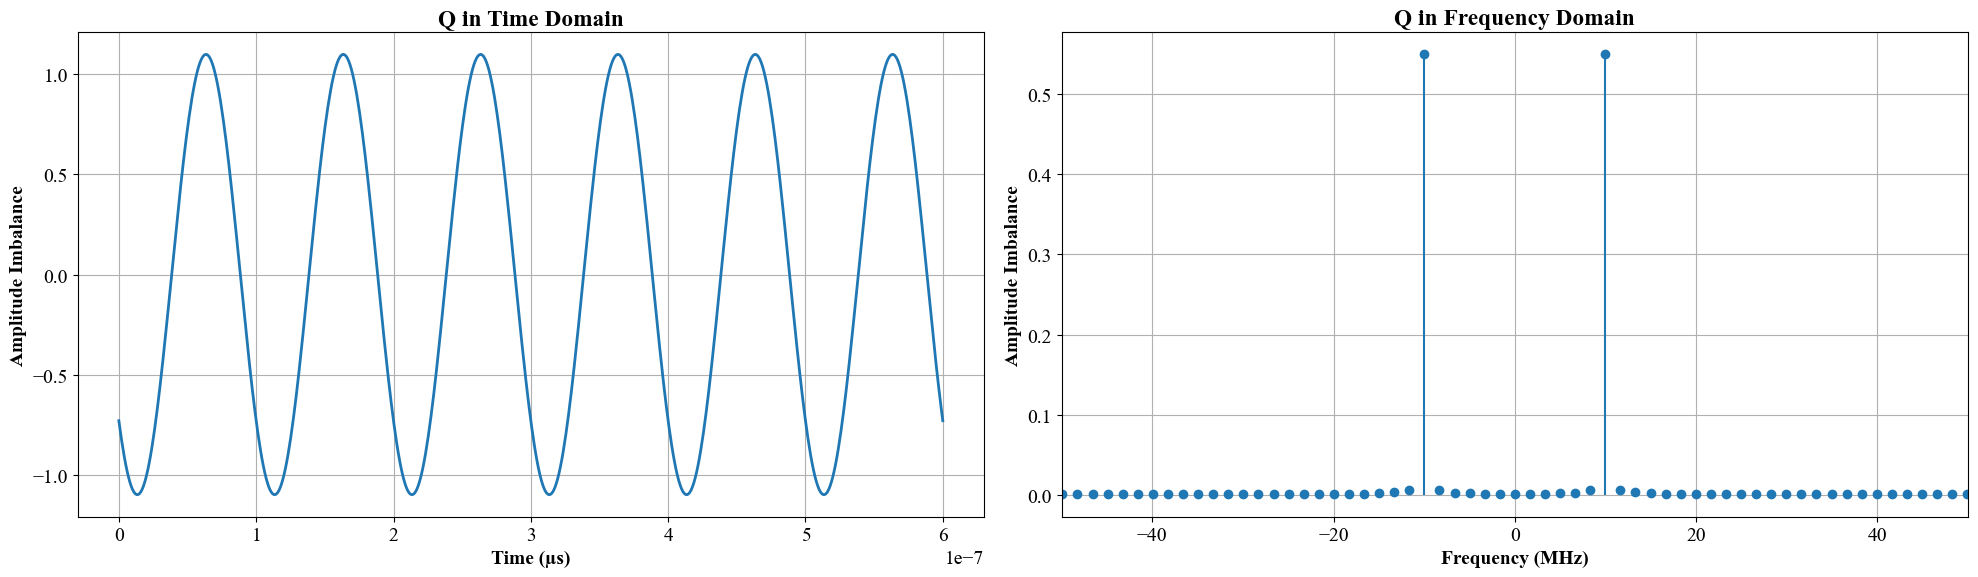

In [75]:
plot("Q",t_micro, t_micro_f/10**6, z_q, z_q_f,[-5*10,5*10])

In [76]:
# Estimate amplitude offset (ĝ)
numerator_g = np.sum(np.abs(z_q)**2)
denominator_g = np.sum(np.abs(z_i)**2)
g_hat = np.sqrt(numerator_g / denominator_g)

# Estimate phase offset (ϕ̂)
numerator_phi = np.sum(z_i*z_q)
denominator_phi = np.sqrt(np.sum(np.abs(z_q**2)) * np.sum(np.abs(z_i)**2))
phi_hat = np.arcsin(numerator_phi / denominator_phi)


In [77]:
# Calculate errors
amplitude_error = (np.abs(g_hat) - np.abs(closest_g)) * 100 / np.abs((closest_g))
phase_error = (np.abs(phi_hat) - np.abs((closest_phi))) * 100 / np.abs(closest_phi)

# Print results with formatted output
print(f"Estimated Amplitude Offset (ĝ): {g_hat:.04f}, Real Amplitude Offset (g): {closest_g:.04f}, error={amplitude_error:.04f}%")
print(f"Estimated Phase Offset (ϕ̂): {phi_hat:.04f}, Real Phase Offset (ϕ): {closest_phi:.04f}, error={phase_error:.04f}%")

Estimated Amplitude Offset (ĝ): 1.0999, Real Amplitude Offset (g): 1.1000, error=-0.0099%
Estimated Phase Offset (ϕ̂): 0.0577, Real Phase Offset (ϕ): 0.0593, error=-2.7989%


In [78]:
np.rad2deg(phi_hat)

3.304838183715202